[-1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1]
1.0232340908548998


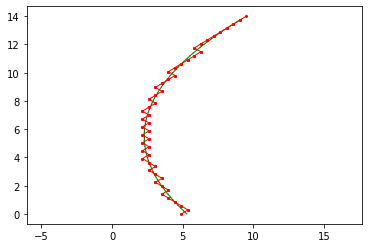

In [4]:
#Sawyer Thomas 
#University of Washington Transformative Robotics Lab
#code to generate a valid lattice configuration for an arbitrary edge configuration

#imports
import numpy as np
import matplotlib.pyplot as plt

#define xp as an arbitrary function
xp=lambda py: .1*((py-7)**2+3*py+4)
#define resolution as the number of cells vertically in the lattice
resolution=50


def plot_prof(point_list,match):
    '''displays the profile that was just generated
    input: point_lists: points from the original function (x,y), match: generated lattice profile
    outputs: none'''
    xs=point_list[0]
    ys=point_list[1]
    xsm=match[0]
    ysm=match[1]
    
    fig = plt.figure()
    plt.axis('equal')
    for i in range(len(xs)-1):
        plt.plot((xs[i],xs[i+1]),( ys[i],ys[i+1]),'go-', label='line 1', linewidth=1, markersize=0)

    for i in range(len(xsm)-1):
        plt.plot((xsm[i],xsm[i+1]),( ysm[i],ysm[i+1]),'ro-', label='line 1', linewidth=1, markersize=2)

        
        
def find_max_slope(pts):
    '''determines the steepest element in the function
    input: pts: the x,y points of the function
    outputs: theta value (scalar)'''
    max=0
    for i in range(len(pts[0])-1):
        slope=abs((pts[0][i]-pts[0][i+1])/(pts[1][i]-pts[1][i+1]))
        if slope>max:
            max=slope
    return max




def match_function(xp,resolution):
    '''finds the closest approximation of a curve with a lattice
    input: xp: a function, resolution: number of cells vertically in lattice
    outputs: match_prof: the profile that best matches the function, theta: angle the lattice must compress to '''
    
    #geometric definitions
    wid=2
    a=1
    tall=2*a
    start=14
    height=14
    match_prof=[]
    xs=[]
    ys=[]
    
    #define a number of points from the function
    for i in np.arange(start-height,start,.2):
        xs.append(xp(i))
        ys.append(i)
    curve_pts=[xs,ys]

    #define the max slope of the function
    max_slope=find_max_slope(curve_pts)
    theta=np.arctan(max_slope)
    
    #find magnitude of compression
    compression=1-np.cos(theta)
    
    #define the x displacement for each cell in the lattice
    x_disp=(height/resolution)*np.tan(theta)

    curx=xp(start)
    cury=start
    cur_approx=curx
    
    #step through each point making up the function
    for i in range(resolution):
        cury-=(height/resolution)
        newx=xp(cury)
        #add positive or negative slopes
        if newx>cur_approx:
            match_prof.append(1)
            cur_approx+=x_disp
        else:
            match_prof.append(-1)
            cur_approx-=x_disp

    curx=xp(start)
    cury=start
    match_xs=[xp(start)]
    match_ys=[start]
    #define the x and y values for plotting
    for i in range(resolution):
        curx+=match_prof[i]*x_disp
        cury-=(height/resolution)
        match_xs.append(curx)
        match_ys.append(cury)
    match_pts=[match_xs,match_ys]
    
    #plot the profile
    plot_prof(curve_pts,match_pts)
    return match_prof, theta

match_prof,theta=match_function(xp,resolution)

print(match_prof)
print(theta)

